In [4]:
''' Problem Statement
Employee attrition (leaving the company) is costly for organizations.  
This project predicts which employees are likely to leave, helping HR improve retention strategies.'''

# Basic libraries
import numpy as np
import pandas as pd 

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import ConfusionMatrixDisplay

# Imbalance Handling
from imblearn.over_sampling import SMOTE

# Save model
import joblib

In [5]:
# Load dataset
df=pd.read_csv(r"D:\portfolio project employee attrition\WA_Fn-UseC_-HR-Employee-Attrition.csv")

C:\Users\ramme\AppData\Local\Temp\ipykernel_2064\971135942.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(  x="Attrition",


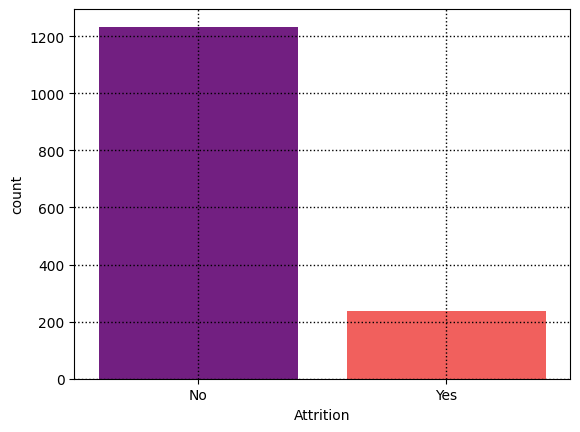

Accuracy: 0.7993197278911565

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       247
           1       0.38      0.40      0.39        47

    accuracy                           0.80       294
   macro avg       0.63      0.64      0.64       294
weighted avg       0.80      0.80      0.80       294


Confusion Matrix:
 [[216  31]
 [ 28  19]]


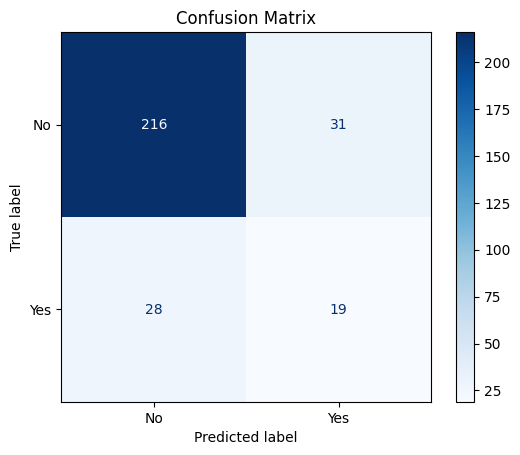

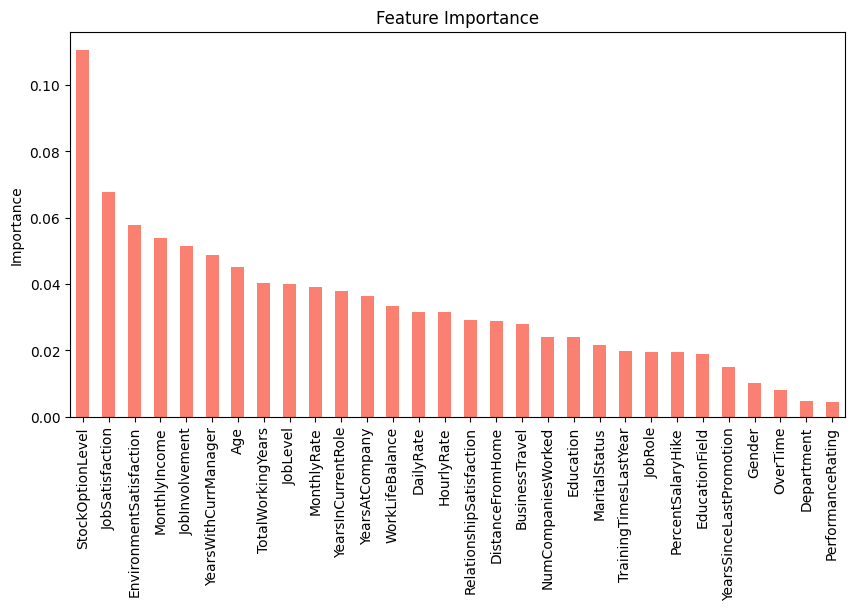

['scaler.pkl']

In [6]:
# Quick overview (commented to avoid messy output)

# print("isnull",df.isnull().sum())
# print("Shape:", df.shape)
# print("Columns:", df.columns.tolist())
# print(df.head())

# Remove duplicates
df.drop_duplicates(inplace=True)

# check target distribution
df["Attrition"].value_counts()

# Drop irrelevant columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True, errors='ignore')

# Identify categorical column
cat_col=df.select_dtypes(include=[object]).columns

# visualize target distribution
categories = sorted(df['Attrition'].unique())
sns.countplot(  x="Attrition",
                data=df,
                palette="magma",
                order=categories,
                saturation=5)
plt.xticks(categories, ['No','Yes'])
plt.grid(linestyle=':',
         linewidth=1,
         color='black')
plt.show()

# Encode categorical columns
le=LabelEncoder()
for col in cat_col:
    df[col]=le.fit_transform(df[col])
#print(df[col].head())

# Separate features and target
X=df.drop("Attrition",axis=1)
y=df['Attrition']

# Split dataset (80% train, 20% test), stratified by target
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Handle class imbalance using SMOTE
smote=SMOTE(random_state=42)
Xtrain_smote,ytrain_smote=smote.fit_resample(Xtrain,ytrain)
#print("Before SMOTE:", ytrain.value_counts())
#print("After SMOTE:", ytrain_smote.value_counts())

# Scaling Features
scaler=StandardScaler()
Xtrain_scaled=scaler.fit_transform(Xtrain_smote)
Xtest_scaled=scaler.transform(Xtest)

# Model Building
model=RandomForestClassifier(random_state=42,
                            max_depth=10,
                            max_features='sqrt',
                            min_samples_split=5,
                            min_samples_leaf=3,
                            n_estimators=200,
                            class_weight='balanced')

# Train model
model.fit(Xtrain_scaled,ytrain_smote)

# Predictions
y_pre=model.predict(Xtest_scaled)

# Model Evaluat
acc=accuracy_score(ytest,y_pre)
report=classification_report(ytest,y_pre)
con=confusion_matrix(ytest,y_pre)

# print results
print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", con)

# Confusion Matrix plot
dis=ConfusionMatrixDisplay(con, display_labels=['No','Yes']).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Feature Importance & Interpretation
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='salmon')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.show()

# save Model & Scaler
joblib.dump(model,"employee_attrition_model.pkl")
joblib.dump((Xtest, ytest), "test_data.pkl")
joblib.dump(scaler, "scaler.pkl")
